In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('house.csv')

In [5]:
df.head(10)

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019
5,2,0,1097000,1,23,2.5,3067,1,2,220,75.0,1900,31,144.9989,2,4019
6,3,0,1350000,4,155,2.5,3067,2,2,214,190.0,2005,31,144.9964,2,4019
7,2,2,750000,1,23,2.5,3067,2,1,0,94.0,2009,31,144.9965,2,4019
8,2,0,1310000,1,106,2.5,3067,1,2,238,97.0,1890,31,144.9976,2,4019
9,3,0,1200000,1,106,2.5,3067,2,1,113,110.0,1880,31,144.9930,2,4019


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6830 non-null   int64  
 1   Type           6830 non-null   int64  
 2   Price          6830 non-null   int64  
 3   Method         6830 non-null   int64  
 4   SellerG        6830 non-null   int64  
 5   Distance       6830 non-null   float64
 6   Postcode       6830 non-null   int64  
 7   Bathroom       6830 non-null   int64  
 8   Car            6830 non-null   int64  
 9   Landsize       6830 non-null   int64  
 10  BuildingArea   6830 non-null   float64
 11  YearBuilt      6830 non-null   int64  
 12  CouncilArea    6830 non-null   int64  
 13  Longtitude     6830 non-null   float64
 14  Regionname     6830 non-null   int64  
 15  Propertycount  6830 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


In [10]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000559DD500C8>,
      dtype=object)

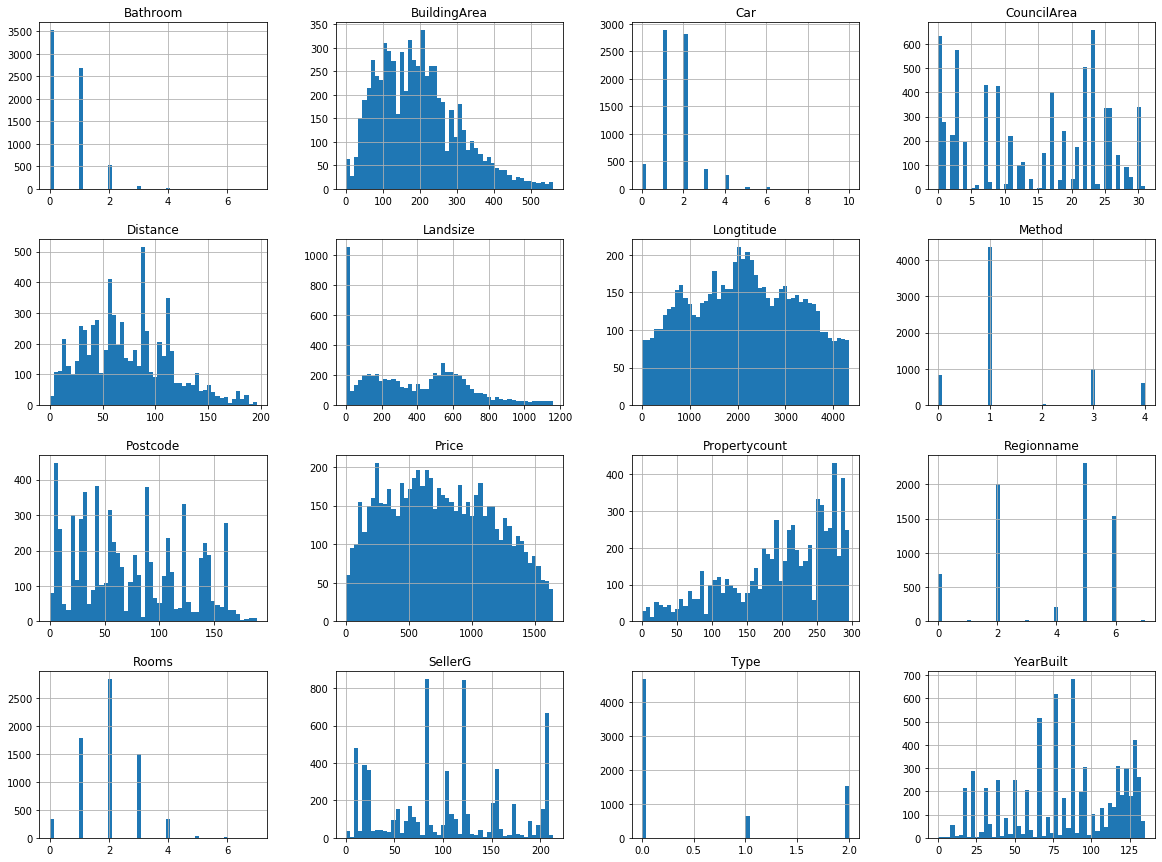

In [107]:
df.hist(bins=50, figsize=(20,15))

Text(0.5, 1, 'Correlation')

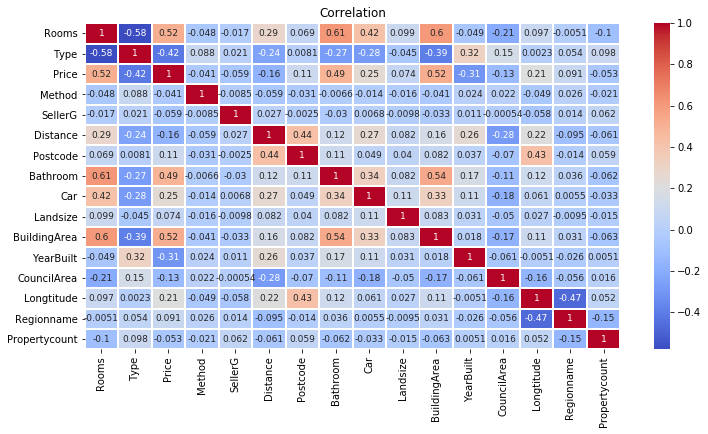

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Correlation')

In [62]:
X=df[['Rooms','Bathroom','Car','Distance','Postcode','Landsize','BuildingArea','CouncilArea',
           'Regionname','Propertycount']]
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state= 1)

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regressor.score(X_train,y_train)

0.5358352614364237

In [65]:
y_pred = regressor.predict(X_test)

In [66]:
regressor.score(X_test,y_test)

0.4853771704643133

In [67]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 311249.03959666454
MSE: 267748212104.65927
RMSE: 517443.9217003706


In [68]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.4858239528195346


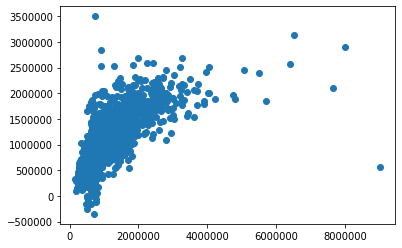

In [69]:
plt.scatter(y_test, y_pred)

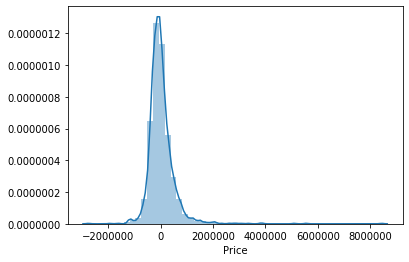

In [70]:
sns.distplot((y_test - y_pred))

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
for col in df :
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [74]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,1,0,872,1,18,12,52,0,0,111,85,23,30,2080,2,144
1,2,0,1166,3,18,12,52,1,0,89,224,23,30,2095,2,144
2,3,0,1227,4,120,12,52,0,2,75,212,131,30,2092,2,144
3,2,0,1348,1,120,12,52,1,0,199,313,32,30,2179,2,144
4,1,0,1247,1,120,12,52,0,2,210,143,17,30,2110,2,144


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Rooms          6830 non-null   int64
 1   Type           6830 non-null   int64
 2   Price          6830 non-null   int64
 3   Method         6830 non-null   int64
 4   SellerG        6830 non-null   int64
 5   Distance       6830 non-null   int64
 6   Postcode       6830 non-null   int64
 7   Bathroom       6830 non-null   int64
 8   Car            6830 non-null   int64
 9   Landsize       6830 non-null   int64
 10  BuildingArea   6830 non-null   int64
 11  YearBuilt      6830 non-null   int64
 12  CouncilArea    6830 non-null   int64
 13  Longtitude     6830 non-null   int64
 14  Regionname     6830 non-null   int64
 15  Propertycount  6830 non-null   int64
dtypes: int64(16)
memory usage: 853.9 KB


In [79]:
x=df[['Rooms','Bathroom','Car','Distance','Postcode','Landsize','BuildingArea','CouncilArea',
           'Regionname','Propertycount']]
y = df['Price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .30, random_state= 1)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [82]:
lin=LinearRegression()

In [83]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lin.score(x_train,y_train)

0.6532778544516019

In [85]:
y_pred = lin.predict(x_test)

In [86]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 195.36593255964402
MSE: 60497.483847798925
RMSE: 245.96236266510152


In [87]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6579183077792805


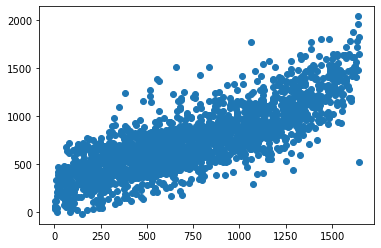

In [88]:
plt.scatter(y_test, y_pred)

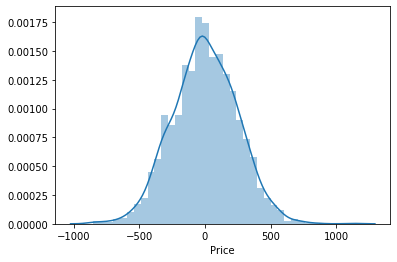

In [89]:
sns.distplot((y_test - y_pred))

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin.fit(x_poly, y_train)
y_pred = lin.predict(poly_reg.transform(x_test))

In [100]:
y_pred = lin.predict(poly_reg.transform(x_test))
y_pred

array([1008.19671391, 1152.43265795,  974.88850929, ..., 1142.75239988,
       1307.5255452 ,  460.26073263])

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7829704632875387

In [102]:
from sklearn.linear_model import Lasso  
from sklearn.linear_model import Ridge  


In [105]:
for i in range (50): 
    l2=Ridge(i)
    l2.fit(x_train,y_train)
    print(l2.score(x_test,y_test))

0.657918297033139
0.6579158917056508
0.6579134609060764
0.6579110047443336
0.6579085233298412
0.6579060167715213
0.6579034851778018
0.6579009286566198
0.6578983473154234
0.6578957412611749
0.6578931106003527
0.6578904554389549
0.6578877758825006
0.6578850720360334
0.6578823440041242
0.6578795918908718
0.6578768157999078
0.6578740158343974
0.6578711920970433
0.6578683446900859
0.6578654737153085
0.6578625792740374
0.6578596614671457
0.657856720395055
0.6578537561577383
0.6578507688547217
0.6578477585850873
0.6578447254474751
0.6578416695400857
0.6578385909606828
0.6578354898065943
0.6578323661747161
0.6578292201615131
0.6578260518630226
0.6578228613748551
0.6578196487921983
0.6578164142098177
0.6578131577220594
0.6578098794228525
0.6578065794057111
0.6578032577637364
0.6577999145896186
0.6577965499756395
0.6577931640136743
0.6577897567951939
0.6577863284112666
0.6577828789525608
0.6577794085093465
0.6577759171714972
0.657772405028493


In [106]:
for i in range(200,500,50): 
    l1=Lasso(i)
    l1.fit(x_train,y_train)
    print(l1.score(x_test,y_test))

0.6092970855252762
0.6078450977730163
0.6059549745455037
0.6056243075065282
0.6052488881476463
0.6048114219846645


In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
l2=Ridge(2)
l1=Lasso(200)

In [127]:
# Cross Validation for Lasso:
l1_cross=cross_val_score(l1,x,y,cv=4)

In [128]:
l1_cross 

array([0.65252225, 0.57138912, 0.57133123, 0.51633753])

In [129]:
# Lasso: Mean
np.mean(l1_cross)

0.577895032905285

In [132]:
#Linear Regreession: Cross validation
scores= cross_val_score(lin,x,y,scoring='r2',cv=4)
scores

array([0.69333786, 0.61044505, 0.6187704 , 0.59478334])

In [133]:
np.mean(scores) # For Linear

0.6293341638854515

In [134]:
#Ridge : Cross Validation
l2_cross=cross_val_score(l2,x,y,cv=4)
l2_cross

array([0.6933405 , 0.61042501, 0.61877259, 0.59479104])

In [135]:
np.mean(l2_cross) # For Ridge

0.6293322858316341